In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to C:\Users\Nivarthi
[nltk_data]     Vishwas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
!git clone https://github.com/laxmimerit/IMDB-Movie-Reviews-Large-Dataset-50k.git

fatal: destination path 'IMDB-Movie-Reviews-Large-Dataset-50k' already exists and is not an empty directory.


In [3]:
df = pd.read_excel('IMDB-Movie-Reviews-Large-Dataset-50k/train.xlsx',dtype=str)
df

Reviews Sentiment
0      When I first tuned in on this morning news, I ...       neg
1      Mere thoughts of "Going Overboard" (aka "Babes...       neg
2      Why does this movie fall WELL below standards?...       neg
3      Wow and I thought that any Steven Segal movie ...       neg
4      The story is seen before, but that does'n matt...       neg
...                                                  ...       ...
24995  Everyone plays their part pretty well in this ...       pos
24996  It happened with Assault on Prescient 13 in 20...       neg
24997  My God. This movie was awful. I can't complain...       neg
24998  When I first popped in Happy Birthday to Me, I...       neg
24999  So why does this show suck? Unfortunately, tha...       neg

[25000 rows x 2 columns]

In [4]:
df.shape

(25000, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Reviews    25000 non-null  object
 1   Sentiment  25000 non-null  object
dtypes: object(2)
memory usage: 390.8+ KB


Text(0.5, 1.0, 'Sentiment Distribution')

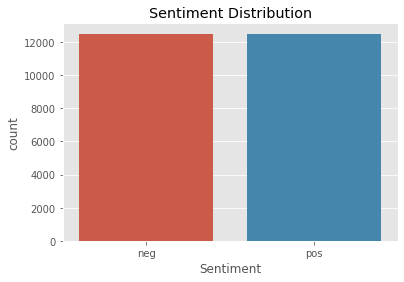

In [6]:
sns.countplot(x='Sentiment',data=df)
plt.title('Sentiment Distribution')

In [7]:
for i in range(5):
    print("Review:",[i])
    print(df["Reviews"].iloc[i],"\n")
    print("Sentiment: ",df["Sentiment"].iloc[i],"\n")

Review: [0]
When I first tuned in on this morning news, I thought, "wow, finally, some entertainment." It was slightly amusing for a week or so... But we have to face it, these news reporters (if one can even call them that) have WAY TOO MUCH "playing around" time.<br /><br />At first, I thought Jillian was a breathe of fresh air. But seriously, this woman has got not the least bit of journalist in her. She is very unprofessional. She keeps on interrupting Steve when he starts informing the viewers about a certain news report. It's just really become annoying to the point that I can't watch it anymore.<br /><br />Jillian is NOT a good journalist. Hell, she's more of a celebrity who loves being a celebrity. Hence, she instantly transforms into a celebrity around celebrities whom she's supposed to be interviewing. She's not very professional and quite possibly perceives her relationship with celebrities more important than being a rightfully insatiable journalist- and that's all I can sa

In [8]:
def no_of_words(text):
    words = text.split()
    word_count = len(words)
    return word_count

In [9]:
df['word_count'] = df["Reviews"].apply(no_of_words)

In [10]:
df.head()

Reviews Sentiment  word_count
0  When I first tuned in on this morning news, I ...       neg         297
1  Mere thoughts of "Going Overboard" (aka "Babes...       neg          59
2  Why does this movie fall WELL below standards?...       neg         239
3  Wow and I thought that any Steven Segal movie ...       neg         149
4  The story is seen before, but that does'n matt...       neg         216

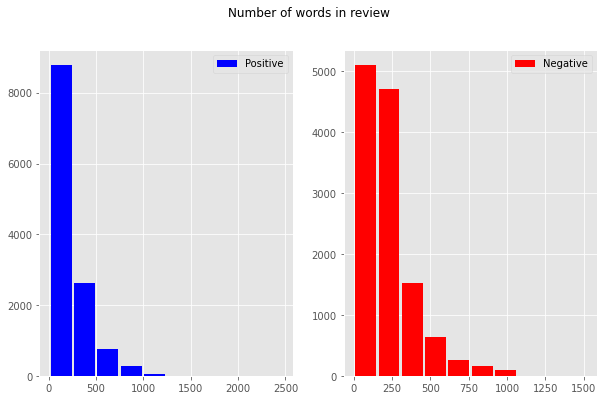

In [11]:
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax[0].hist(df[df["Sentiment"]=="pos"]["word_count"],label="Positive",color="blue",rwidth=0.9)
ax[0].legend(loc='upper right')
ax[1].hist(df[df["Sentiment"]=="neg"]["word_count"],label="Negative",color="red",rwidth=0.9)
ax[1].legend(loc='upper right')
fig.suptitle("Number of words in review")
plt.show()

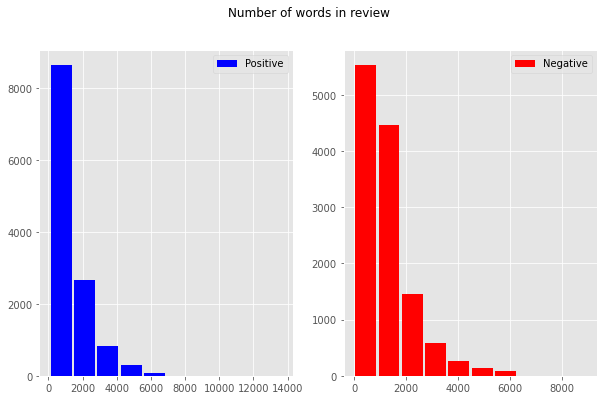

In [12]:
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax[0].hist(df[df["Sentiment"]=="pos"]["Reviews"].str.len(),label="Positive",color="blue",rwidth=0.9)
ax[0].legend(loc='upper right')
ax[1].hist(df[df["Sentiment"]=="neg"]["Reviews"].str.len(),label="Negative",color="red",rwidth=0.9)
ax[1].legend(loc='upper right')
fig.suptitle("Number of words in review")
plt.show()

In [13]:
df.Sentiment.replace("pos",1,inplace=True)
df.Sentiment.replace("neg",2,inplace=True)

In [14]:
df.head()

Reviews  Sentiment  word_count
0  When I first tuned in on this morning news, I ...          2         297
1  Mere thoughts of "Going Overboard" (aka "Babes...          2          59
2  Why does this movie fall WELL below standards?...          2         239
3  Wow and I thought that any Steven Segal movie ...          2         149
4  The story is seen before, but that does'n matt...          2         216

In [15]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to C:\Users\Nivarthi
[nltk_data]     Vishwas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
def data_processing(text):
    text = text.lower()
    text=re.sub('<br />','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [17]:
df.Reviews = df["Reviews"].apply(data_processing)

In [18]:
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ",duplicated_count)

Number of duplicate entries:  97


In [19]:
df = df.drop_duplicates("Reviews")

In [20]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [21]:
df.Reviews = df["Reviews"].apply(lambda x: stemming(x))

C:\Python39\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [22]:
df['word_count'] = df["Reviews"].apply(no_of_words)
df.head()

C:\Users\NIVART~1\AppData\Local\Temp/ipykernel_29756/522557181.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df["Reviews"].apply(no_of_words)


Reviews  Sentiment  word_count
0  first tuned morning news thought wow finally e...          2         158
1  mere thoughts going overboard aka babes ahoy m...          2          34
2  movie fall well standards ultimately answer li...          2         132
3  wow thought steven segal movie bad every time ...          2          79
4  story seen matter figure make proper storyboar...          2          94

In [23]:
pos_reviews = df[df.Sentiment == 1]
pos_reviews.head()

Reviews  Sentiment  word_count
7   think still best routine others like rocks bri...          1          67
8   far parody films go worth time energy recent r...          1          89
10  panic streets fairly unknown little movie dire...          1         127
11  lose friends alienate people based tiger woods...          1         175
12  saw film last night cable extraordinary love u...          1          75

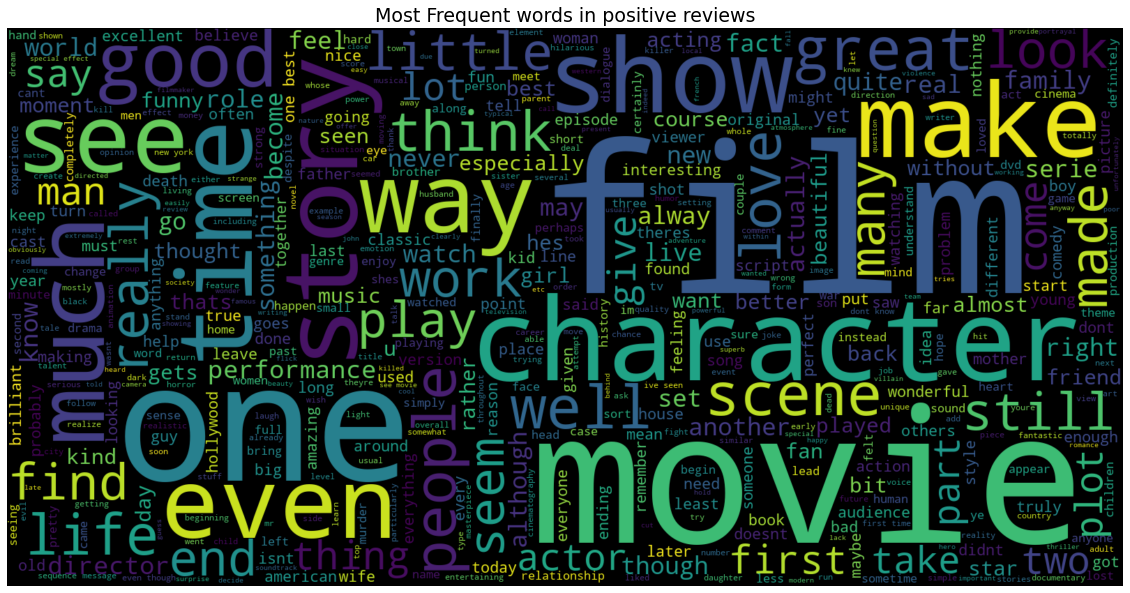

In [24]:
text = ' '.join([word for word in pos_reviews["Reviews"]])
plt.figure(figsize=(20,15),facecolor='None')
wordcloud = WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent words in positive reviews',fontsize=19)
plt.show()

In [25]:
from collections import Counter
count = Counter()
for text in pos_reviews["Reviews"].values:
    for word in text.split():
        count[word]+=1
count.most_common(15)

[('film', 19572),
 ('movie', 18113),
 ('one', 12850),
 ('like', 8669),
 ('good', 7359),
 ('story', 6472),
 ('great', 6245),
 ('time', 5992),
 ('see', 5803),
 ('well', 5487),
 ('really', 5428),
 ('also', 5418),
 ('would', 5279),
 ('even', 4808),
 ('much', 4572)]

In [26]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word','count']
pos_words.head()

word  count
0   film  19572
1  movie  18113
2    one  12850
3   like   8669
4   good   7359

In [27]:
px.bar(pos_words,x='count',y='word',title="Common words in positive reviews")

In [28]:
neg_reviews = df[df.Sentiment == 2]
neg_reviews.head()

Reviews  Sentiment  word_count
0  first tuned morning news thought wow finally e...          2         158
1  mere thoughts going overboard aka babes ahoy m...          2          34
2  movie fall well standards ultimately answer li...          2         132
3  wow thought steven segal movie bad every time ...          2          79
4  story seen matter figure make proper storyboar...          2          94

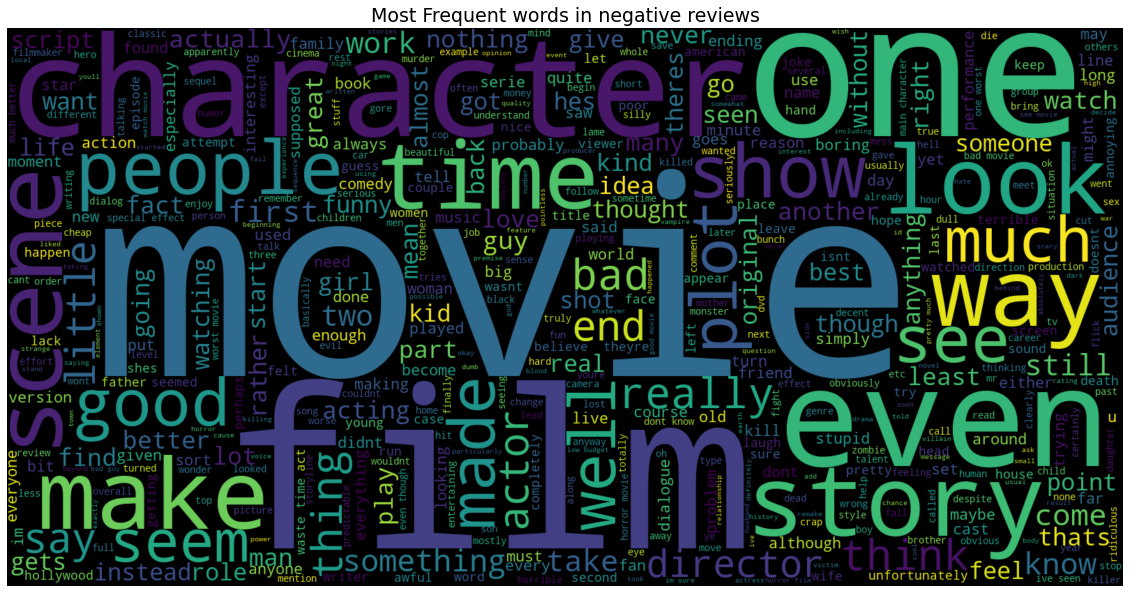

In [30]:
text = ' '.join([word for word in neg_reviews["Reviews"]])
plt.figure(figsize=(20,15),facecolor='None')
wordcloud = WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent words in negative reviews',fontsize=19)
plt.show()

In [31]:
from collections import Counter
count = Counter()
for text in neg_reviews["Reviews"].values:
    for word in text.split():
        count[word]+=1
count.most_common(15)

[('movie', 23551),
 ('film', 17792),
 ('one', 12218),
 ('like', 10833),
 ('even', 7478),
 ('good', 7112),
 ('bad', 7030),
 ('would', 6807),
 ('really', 6172),
 ('time', 5732),
 ('see', 5332),
 ('dont', 5019),
 ('get', 4954),
 ('much', 4941),
 ('story', 4924)]

In [32]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word','count']
neg_words.head()

word  count
0  movie  23551
1   film  17792
2    one  12218
3   like  10833
4   even   7478

In [33]:
px.bar(neg_words,x='count',y='word',title="Common words in negative reviews")

In [34]:
X=df["Reviews"]
Y=df["Sentiment"]

In [35]:
vect = TfidfVectorizer()
X=vect.fit_transform(df["Reviews"])

In [36]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [38]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred,y_test)
print("Test Accuracy: {:.2f}%".format(logreg_acc*100))

Test Accuracy: 88.66%


In [39]:
print(confusion_matrix(y_test,logreg_pred))
print("\n")
print(classification_report(y_test,logreg_pred))

[[2264  245]
 [ 320 2152]]


              precision    recall  f1-score   support

           1       0.88      0.90      0.89      2509
           2       0.90      0.87      0.88      2472

    accuracy                           0.89      4981
   macro avg       0.89      0.89      0.89      4981
weighted avg       0.89      0.89      0.89      4981



In [40]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
mnb_pred = mnb.predict(x_test)
mnb_acc = accuracy_score(mnb_pred,y_test)
print("Test Accuracy: {:.2f}%".format(mnb_acc*100))

Test Accuracy: 86.99%


In [41]:
print(confusion_matrix(y_test,mnb_pred))
print("\n")
print(classification_report(y_test,mnb_pred))

[[2165  344]
 [ 304 2168]]


              precision    recall  f1-score   support

           1       0.88      0.86      0.87      2509
           2       0.86      0.88      0.87      2472

    accuracy                           0.87      4981
   macro avg       0.87      0.87      0.87      4981
weighted avg       0.87      0.87      0.87      4981



In [42]:
svc = LinearSVC()
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred,y_test)
print("Test Accuracy: {:.2f}%".format(svc_acc*100))

Test Accuracy: 88.96%


In [43]:
print(confusion_matrix(y_test,svc_pred))
print("\n")
print(classification_report(y_test,svc_pred))

[[2263  246]
 [ 304 2168]]


              precision    recall  f1-score   support

           1       0.88      0.90      0.89      2509
           2       0.90      0.88      0.89      2472

    accuracy                           0.89      4981
   macro avg       0.89      0.89      0.89      4981
weighted avg       0.89      0.89      0.89      4981



In [50]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier

In [45]:
rf = RandomForestClassifier(n_estimators= 10, criterion="entropy")

In [46]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [47]:
rf_pred = rf.predict(x_test)
rf_acc = accuracy_score(rf_pred,y_test)
print("Test Accuracy: {:.2f}%".format(rf_acc*100))

Test Accuracy: 76.63%


In [48]:
ada = AdaBoostClassifier(n_estimators=50,learning_rate=1)
ada.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=1)

In [53]:
ada_pred = ada.predict(x_test)
ada_acc = accuracy_score(ada_pred,y_test)
print("Test Accuracy: {:.2f}%".format(ada_acc*100))

Test Accuracy: 79.58%


In [74]:
bgclassifier = BaggingClassifier(base_estimator=svc,n_estimators=100,max_samples=10,random_state=1,n_jobs=5)

In [75]:
bgclassifier.fit(x_train,y_train)

BaggingClassifier(base_estimator=LinearSVC(), max_samples=10, n_estimators=100,
                  n_jobs=5, random_state=1)

In [76]:
bgclassifier_pred = bgclassifier.predict(x_test)
bgclassifier_acc = accuracy_score(bgclassifier_pred,y_test)
print("Test Accuracy: {:.2f}%".format(bgclassifier_acc*100))

Test Accuracy: 71.59%


In [80]:
from catboost import CatBoostClassifier

In [81]:
catboost = CatBoostClassifier()

In [82]:
catboost.fit(x_train,y_train)

Learning rate set to 0.036961
0:	learn: 0.6826964	total: 2.02s	remaining: 33m 35s
1:	learn: 0.6736841	total: 3.35s	remaining: 27m 51s
2:	learn: 0.6653840	total: 4.44s	remaining: 24m 35s
3:	learn: 0.6576430	total: 5.66s	remaining: 23m 30s
4:	learn: 0.6504420	total: 6.88s	remaining: 22m 48s
5:	learn: 0.6434534	total: 8.07s	remaining: 22m 16s
6:	learn: 0.6378083	total: 9.14s	remaining: 21m 36s
7:	learn: 0.6314148	total: 10.2s	remaining: 21m 7s
8:	learn: 0.6260340	total: 11.3s	remaining: 20m 40s
9:	learn: 0.6211580	total: 12.3s	remaining: 20m 20s
10:	learn: 0.6165703	total: 13.4s	remaining: 20m 1s
11:	learn: 0.6120127	total: 14.5s	remaining: 19m 52s
12:	learn: 0.6079617	total: 15.5s	remaining: 19m 38s
13:	learn: 0.6046651	total: 16.5s	remaining: 19m 25s
14:	learn: 0.6009772	total: 17.6s	remaining: 19m 16s
15:	learn: 0.5973099	total: 18.6s	remaining: 19m 3s
16:	learn: 0.5935666	total: 19.6s	remaining: 18m 51s
17:	learn: 0.5904232	total: 20.5s	remaining: 18m 40s
18:	learn: 0.5877681	total: 2

153:	learn: 0.4402462	total: 2m 34s	remaining: 14m 10s
154:	learn: 0.4397755	total: 2m 35s	remaining: 14m 9s
155:	learn: 0.4393597	total: 2m 36s	remaining: 14m 7s
156:	learn: 0.4388451	total: 2m 37s	remaining: 14m 6s
157:	learn: 0.4383453	total: 2m 38s	remaining: 14m 4s
158:	learn: 0.4378250	total: 2m 39s	remaining: 14m 4s
159:	learn: 0.4373084	total: 2m 40s	remaining: 14m 2s
160:	learn: 0.4369537	total: 2m 41s	remaining: 14m 2s
161:	learn: 0.4363892	total: 2m 42s	remaining: 14m
162:	learn: 0.4359071	total: 2m 43s	remaining: 13m 59s
163:	learn: 0.4353970	total: 2m 44s	remaining: 13m 58s
164:	learn: 0.4349121	total: 2m 45s	remaining: 13m 57s
165:	learn: 0.4342938	total: 2m 46s	remaining: 13m 55s
166:	learn: 0.4338307	total: 2m 47s	remaining: 13m 54s
167:	learn: 0.4333600	total: 2m 48s	remaining: 13m 53s
168:	learn: 0.4328714	total: 2m 49s	remaining: 13m 52s
169:	learn: 0.4323924	total: 2m 50s	remaining: 13m 51s
170:	learn: 0.4319856	total: 2m 51s	remaining: 13m 49s
171:	learn: 0.4315557

304:	learn: 0.3821991	total: 5m	remaining: 11m 25s
305:	learn: 0.3818334	total: 5m 1s	remaining: 11m 24s
306:	learn: 0.3814526	total: 5m 2s	remaining: 11m 23s
307:	learn: 0.3810752	total: 5m 3s	remaining: 11m 22s
308:	learn: 0.3807614	total: 5m 4s	remaining: 11m 21s
309:	learn: 0.3804597	total: 5m 5s	remaining: 11m 20s
310:	learn: 0.3801478	total: 5m 6s	remaining: 11m 19s
311:	learn: 0.3797659	total: 5m 7s	remaining: 11m 18s
312:	learn: 0.3793999	total: 5m 8s	remaining: 11m 16s
313:	learn: 0.3790559	total: 5m 9s	remaining: 11m 15s
314:	learn: 0.3787316	total: 5m 10s	remaining: 11m 14s
315:	learn: 0.3784105	total: 5m 11s	remaining: 11m 13s
316:	learn: 0.3780738	total: 5m 12s	remaining: 11m 12s
317:	learn: 0.3777502	total: 5m 13s	remaining: 11m 11s
318:	learn: 0.3774366	total: 5m 13s	remaining: 11m 10s
319:	learn: 0.3771070	total: 5m 14s	remaining: 11m 9s
320:	learn: 0.3767390	total: 5m 15s	remaining: 11m 8s
321:	learn: 0.3764176	total: 5m 16s	remaining: 11m 6s
322:	learn: 0.3760949	tota

456:	learn: 0.3374662	total: 7m 28s	remaining: 8m 53s
457:	learn: 0.3372295	total: 7m 29s	remaining: 8m 52s
458:	learn: 0.3369923	total: 7m 30s	remaining: 8m 51s
459:	learn: 0.3367735	total: 7m 31s	remaining: 8m 50s
460:	learn: 0.3365183	total: 7m 32s	remaining: 8m 49s
461:	learn: 0.3362901	total: 7m 33s	remaining: 8m 48s
462:	learn: 0.3360017	total: 7m 34s	remaining: 8m 47s
463:	learn: 0.3357567	total: 7m 35s	remaining: 8m 46s
464:	learn: 0.3355205	total: 7m 36s	remaining: 8m 45s
465:	learn: 0.3352522	total: 7m 37s	remaining: 8m 44s
466:	learn: 0.3350266	total: 7m 38s	remaining: 8m 43s
467:	learn: 0.3347742	total: 7m 39s	remaining: 8m 42s
468:	learn: 0.3345484	total: 7m 40s	remaining: 8m 41s
469:	learn: 0.3343249	total: 7m 41s	remaining: 8m 40s
470:	learn: 0.3340936	total: 7m 42s	remaining: 8m 39s
471:	learn: 0.3338684	total: 7m 43s	remaining: 8m 37s
472:	learn: 0.3336259	total: 7m 43s	remaining: 8m 36s
473:	learn: 0.3334151	total: 7m 44s	remaining: 8m 35s
474:	learn: 0.3331871	total:

609:	learn: 0.3053972	total: 9m 51s	remaining: 6m 18s
610:	learn: 0.3052133	total: 9m 52s	remaining: 6m 17s
611:	learn: 0.3050223	total: 9m 53s	remaining: 6m 16s
612:	learn: 0.3048400	total: 9m 54s	remaining: 6m 15s
613:	learn: 0.3046837	total: 9m 55s	remaining: 6m 14s
614:	learn: 0.3045008	total: 9m 56s	remaining: 6m 13s
615:	learn: 0.3043257	total: 9m 57s	remaining: 6m 12s
616:	learn: 0.3041424	total: 9m 58s	remaining: 6m 11s
617:	learn: 0.3039407	total: 9m 59s	remaining: 6m 10s
618:	learn: 0.3037853	total: 10m	remaining: 6m 9s
619:	learn: 0.3036075	total: 10m 1s	remaining: 6m 8s
620:	learn: 0.3034250	total: 10m 2s	remaining: 6m 7s
621:	learn: 0.3032221	total: 10m 3s	remaining: 6m 6s
622:	learn: 0.3030218	total: 10m 4s	remaining: 6m 5s
623:	learn: 0.3028609	total: 10m 5s	remaining: 6m 4s
624:	learn: 0.3027019	total: 10m 6s	remaining: 6m 3s
625:	learn: 0.3025411	total: 10m 7s	remaining: 6m 2s
626:	learn: 0.3023546	total: 10m 8s	remaining: 6m 1s
627:	learn: 0.3022764	total: 10m 9s	rema

760:	learn: 0.2813984	total: 12m 13s	remaining: 3m 50s
761:	learn: 0.2812355	total: 12m 14s	remaining: 3m 49s
762:	learn: 0.2810790	total: 12m 15s	remaining: 3m 48s
763:	learn: 0.2809394	total: 12m 15s	remaining: 3m 47s
764:	learn: 0.2807648	total: 12m 16s	remaining: 3m 46s
765:	learn: 0.2805981	total: 12m 17s	remaining: 3m 45s
766:	learn: 0.2804643	total: 12m 18s	remaining: 3m 44s
767:	learn: 0.2803355	total: 12m 19s	remaining: 3m 43s
768:	learn: 0.2801979	total: 12m 20s	remaining: 3m 42s
769:	learn: 0.2800614	total: 12m 21s	remaining: 3m 41s
770:	learn: 0.2798894	total: 12m 22s	remaining: 3m 40s
771:	learn: 0.2797055	total: 12m 23s	remaining: 3m 39s
772:	learn: 0.2795694	total: 12m 24s	remaining: 3m 38s
773:	learn: 0.2794306	total: 12m 25s	remaining: 3m 37s
774:	learn: 0.2793711	total: 12m 26s	remaining: 3m 36s
775:	learn: 0.2792108	total: 12m 26s	remaining: 3m 35s
776:	learn: 0.2790565	total: 12m 27s	remaining: 3m 34s
777:	learn: 0.2789210	total: 12m 28s	remaining: 3m 33s
778:	learn

910:	learn: 0.2615654	total: 14m 34s	remaining: 1m 25s
911:	learn: 0.2614337	total: 14m 35s	remaining: 1m 24s
912:	learn: 0.2613035	total: 14m 36s	remaining: 1m 23s
913:	learn: 0.2611519	total: 14m 37s	remaining: 1m 22s
914:	learn: 0.2611112	total: 14m 38s	remaining: 1m 21s
915:	learn: 0.2609813	total: 14m 39s	remaining: 1m 20s
916:	learn: 0.2609379	total: 14m 40s	remaining: 1m 19s
917:	learn: 0.2607921	total: 14m 41s	remaining: 1m 18s
918:	learn: 0.2606719	total: 14m 42s	remaining: 1m 17s
919:	learn: 0.2605647	total: 14m 43s	remaining: 1m 16s
920:	learn: 0.2604635	total: 14m 44s	remaining: 1m 15s
921:	learn: 0.2603153	total: 14m 45s	remaining: 1m 14s
922:	learn: 0.2601839	total: 14m 46s	remaining: 1m 13s
923:	learn: 0.2601229	total: 14m 47s	remaining: 1m 12s
924:	learn: 0.2600207	total: 14m 48s	remaining: 1m 12s
925:	learn: 0.2599559	total: 14m 49s	remaining: 1m 11s
926:	learn: 0.2598192	total: 14m 50s	remaining: 1m 10s
927:	learn: 0.2596554	total: 14m 51s	remaining: 1m 9s
928:	learn:

In [84]:
catboost_pred = catboost.predict(x_test)
catboost_acc = accuracy_score(catboost_pred,y_test)
print("Test Accuracy: {:.2f}%".format(catboost_acc*100))

Test Accuracy: 85.83%
